# Car prediction

## importing various dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## data collection and processing

In [2]:
#importing data name
df_main = pd.read_csv('car data.csv')

In [3]:
df_main.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df_main.shape

(301, 9)

In [5]:
# info about dataset
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking the distribution of categrocial data
print(df_main.Fuel_Type.value_counts())
print(df_main.Seller_Type.value_counts())
print(df_main.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [7]:
#encoding data
df_main.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [8]:
df_main.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [9]:
df_main.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [10]:
df_main

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


### spliting training data from test data


In [11]:
X= df_main.drop(['Car_Name','Selling_Price'],axis=1)
y= df_main['Selling_Price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
X_train


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
282,2014,14.00,63000,1,0,0,0
163,2010,0.95,27000,0,1,0,0
42,2008,7.15,58000,0,0,0,0
17,2016,10.79,43000,1,0,0,0
266,2014,7.00,35000,0,0,0,0
...,...,...,...,...,...,...,...
188,2013,0.57,18000,0,1,0,0
71,2011,12.48,45000,1,0,0,0
106,2014,3.45,16500,0,1,0,1
270,2011,10.00,69341,0,0,0,0


In [14]:
reg = LinearRegression()


In [15]:
reg.fit(X_train,y_train)

LinearRegression()

In [17]:
regpredict=reg.predict(X_train)

In [19]:
error_score = metrics.r2_score(y_train,regpredict)

In [20]:
error_score

0.8806173715719124

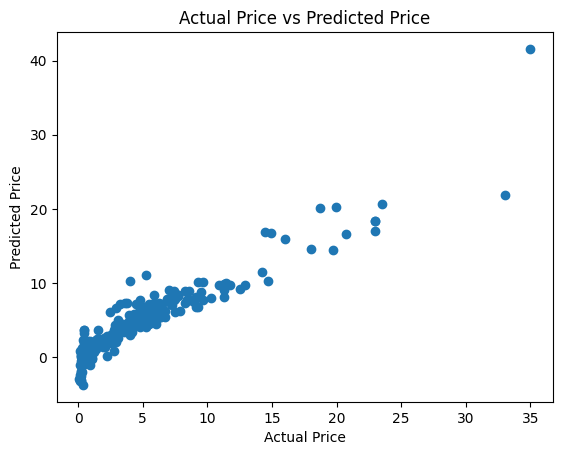

In [21]:
plt.scatter(y_train,regpredict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [22]:
regpredicttest=reg.predict(X_test)

In [25]:
error_score = metrics.r2_score(y_test,regpredicttest)

In [26]:
error_score


0.831106947624384

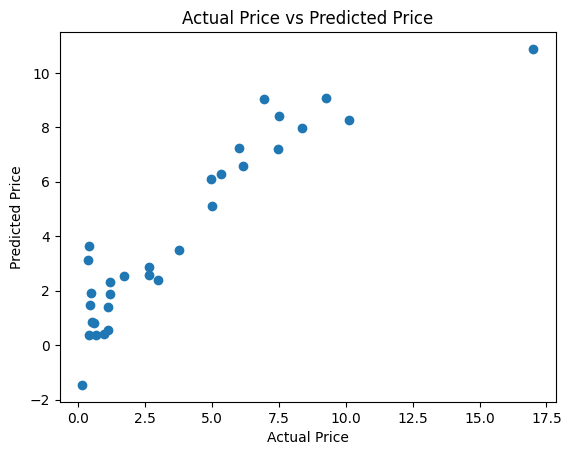

In [27]:
plt.scatter(y_test,regpredicttest)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

### lasso regression

In [29]:
lreg = Lasso()


In [35]:
lreg.fit(X_train,y_train)

Lasso()

In [36]:
lregpredict=lreg.predict(X_train)

In [37]:
error_score = metrics.r2_score(y_train,lregpredict)

In [38]:
error_score

0.8436909482009372

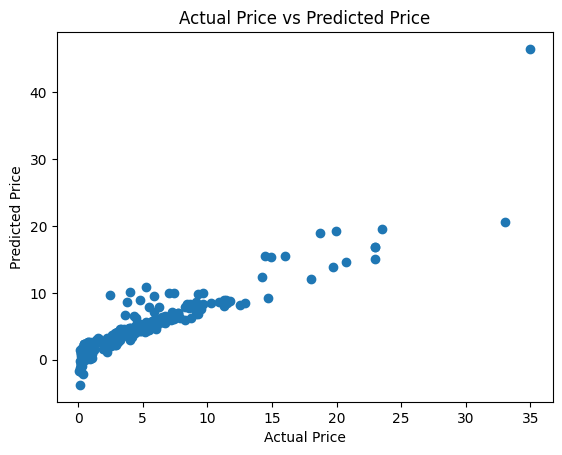

In [39]:
plt.scatter(y_train,lregpredict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [40]:
lregpredicttest=lreg.predict(X_test)

In [41]:
error_score = metrics.r2_score(y_test,lregpredicttest)

In [42]:
error_score

0.839226320049874

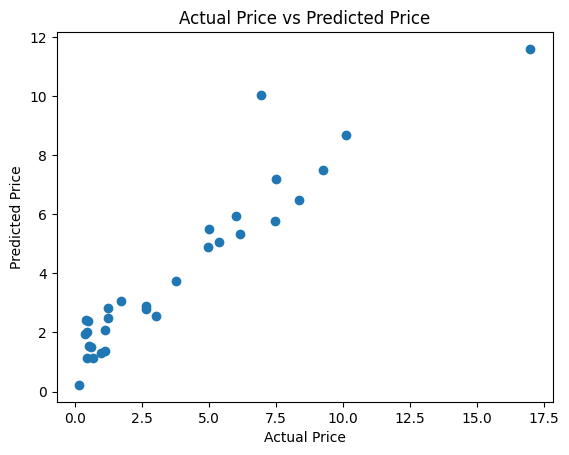

In [43]:
plt.scatter(y_test,lregpredicttest)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()